In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
#membaca dataset pake pandas iris
from google.colab import drive
drive.mount('/content/drive')

path1 = '/content/drive/MyDrive/Tugas_data/covid3.csv'
covid = pd.read_csv(path1)
covid.head()

Mounted at /content/drive


,TAHUN,BULAN,Jumlah orang diperiksa,Negatif,Positif,Meninggal,Sembuh
0,2020,MARET,6777,5249,1528,134,81
1,2020,APRIL,65574,56984,8590,658,1441
2,2020,MEI,151273,134918,16355,821,5786
3,2020,JUNI,253694,223782,29912,1263,17498
4,2020,JULY,389221,337230,51991,2255,41101


In [ ]:
#Membuang atribut yang tidak terpakai dengan menggunakan fitur drop
data = covid.drop(['TAHUN', 'BULAN','Jumlah orang diperiksa'], axis=1)
#menggunakan fitur head untuk menampilkan atribut pada 5 data teratas dari atribut yang tersisa setelah melakukan drop
data.head()

,Negatif,Positif,Meninggal,Sembuh
0,5249,1528,134,81
1,56984,8590,658,1441
2,134918,16355,821,5786
3,223782,29912,1263,17498
4,337230,51991,2255,41101


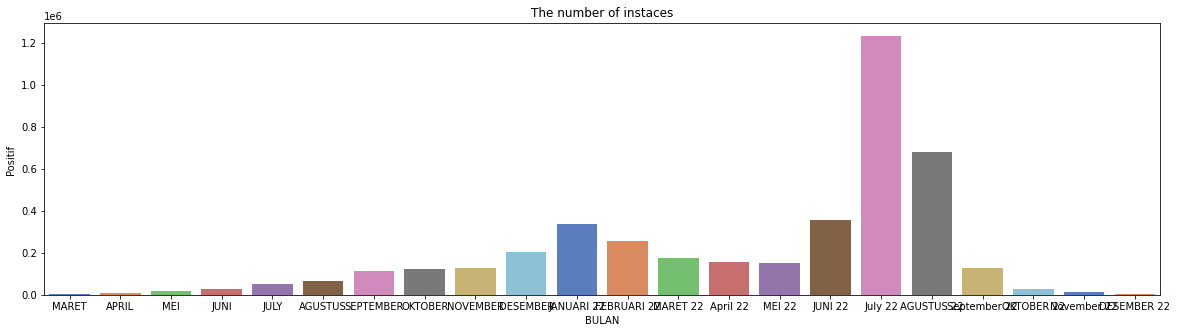

In [ ]:
#plt figure digunakan untuk mengatur ukuran dari plot yang nanti dibuat
plt.figure(figsize=(20, 5))
#menampilkan sebuah plotting dengan sns yaitu dengan menggunakan seaborn
sns.barplot(data=covid,
            x="BULAN", #Memberi nama sumbu x dari plot
            y="Positif ", # memberi nama sumbu y dari plot
            palette = "muted"
           )

plt.title("The number of instaces")
plt.show()

In [ ]:
#Menggunakan n cluster =3 karna kita akan melakukan clusterisasi yang berjumlah 3
clusters_kmeans = KMeans(n_clusters=3, random_state=0).fit(data) #fit atau fitur adalah variable yang kita drop diawal tadi
#Menampilkan label dari cluster
cluster_label = clusters_kmeans.labels_
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
#untuk menentukan hasil sampling itu apakah akan menghasilkan persamaan yang kuat atau tidak
sample_silhouette_values = silhouette_samples(data, cluster_label)
sample_silhouette_values

array([0.77522087, 0.78620398, 0.80010207, 0.81327523, 0.82639081,
       0.82869517, 0.83562321, 0.83051703, 0.82495105, 0.81177707,
       0.77640388, 0.80769763, 0.74512384, 0.72760215, 0.68159244,
       0.3436068 , 0.67236433, 0.68138666, 0.62834839, 0.73197321,
       0.70230697, 0.35407648])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


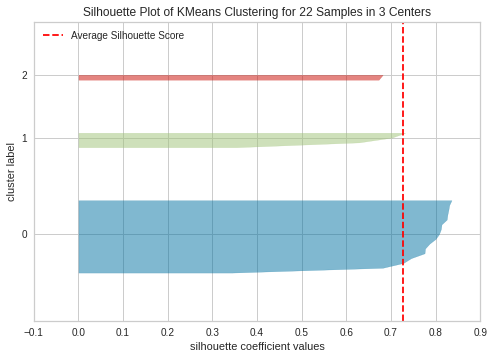

Silhouette average score is 0.7266017847704336


In [ ]:
#Membuat visualisasi untuk menampilkan rata-ratanya berdasarkan hasil sampling diatas agar lebih mudah untuk menganalisis hasil
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

visualizer = SilhouetteVisualizer(clusters_kmeans, colors='yellowbrick')

#fit disini sama yaitu hasil dari drop yang kita buat diatas
visualizer.fit(data)
visualizer.show()

silhouette_avg = silhouette_score(data, cluster_label)
print('Silhouette average score is', silhouette_avg)

In [ ]:
#membuat model visualisasi yang baru, jadi kita buat duplikasi dari data yang ada
new_data = covid.copy() #memanggil data awal

#menggabungkan cluster label ke new data(ibarat memasukan sebuah atribut yang baru)
clstr = pd.DataFrame(cluster_label, columns=['cluster_label'])

new_data['cluster_label'] = clstr

#menampilkan 5 data terawal untuk mengecek apakah sudah masuk atau belum
new_data.head()

,TAHUN,BULAN,Jumlah orang diperiksa,Negatif,Positif,Meninggal,Sembuh,cluster_label
0,2020,MARET,6777,5249,1528,134,81,0
1,2020,APRIL,65574,56984,8590,658,1441,0
2,2020,MEI,151273,134918,16355,821,5786,0
3,2020,JUNI,253694,223782,29912,1263,17498,0
4,2020,JULY,389221,337230,51991,2255,41101,0


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


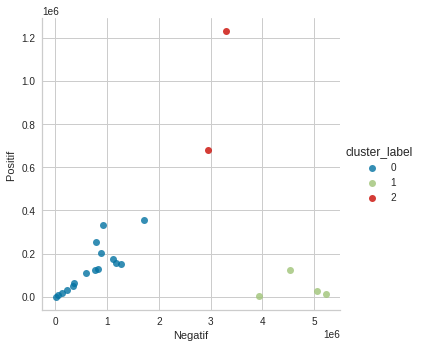

In [ ]:
#menggunakan seaborn untuk melihat distribusi dari atribut yang tertera dibawah
facet = sns.lmplot(data=new_data, x='Negatif', y='Positif ', hue='cluster_label', fit_reg = False, legend=True, legend_out=True)

In [ ]:
#menampilkan nilai kedua cluster
new_data['cluster_label'].unique()

array([0, 2, 1], dtype=int32)

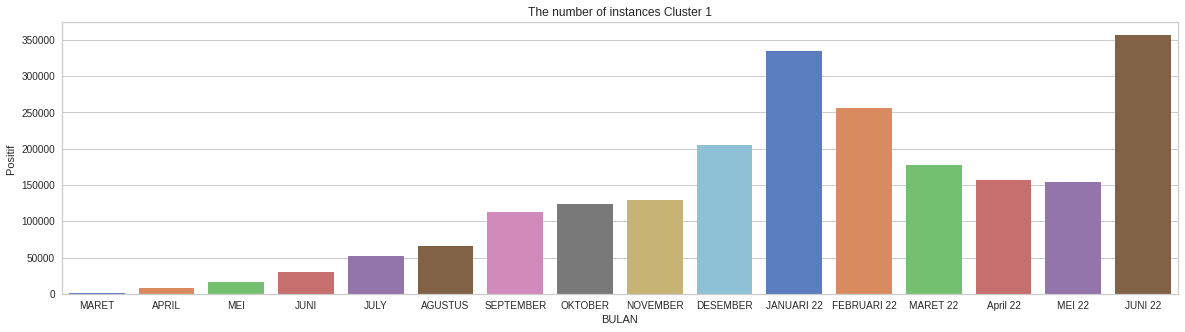

In [ ]:
#untuk melihat jumlah spesies dari atribut yang tadi sudah di drop
Group1 = new_data[new_data['cluster_label']==0]

plt.figure(figsize=(20, 5))
sns.barplot(data=Group1,
            x="BULAN",
            y="Positif ",
            palette = "muted"
           )

plt.title("The number of instances Cluster 1")
plt.show()

In [ ]:
plt.subplots(figsize=(4,3), dpi=100)
ax = sns.countplot(data=Group1, x='Species')
ax.set_title("The number of instances Cluster 1", fontsize=16)
ax.set_xlabel('Species', fontsize=16) # set x Label
ax.set_ylabel('Count', fontsize=16, rotation=90) # set y label
ax.grid(False)

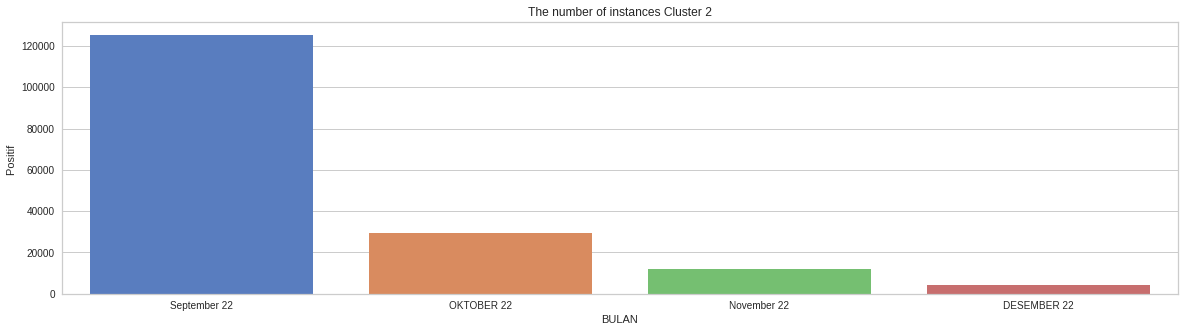

In [ ]:
Group2 = new_data[new_data['cluster_label']==1]
plt.figure(figsize=(20, 5))
sns.barplot(data=Group2,
            x="BULAN",
            y="Positif ",
            palette = "muted"
           )

plt.title("The number of instances Cluster 2")
plt.show()

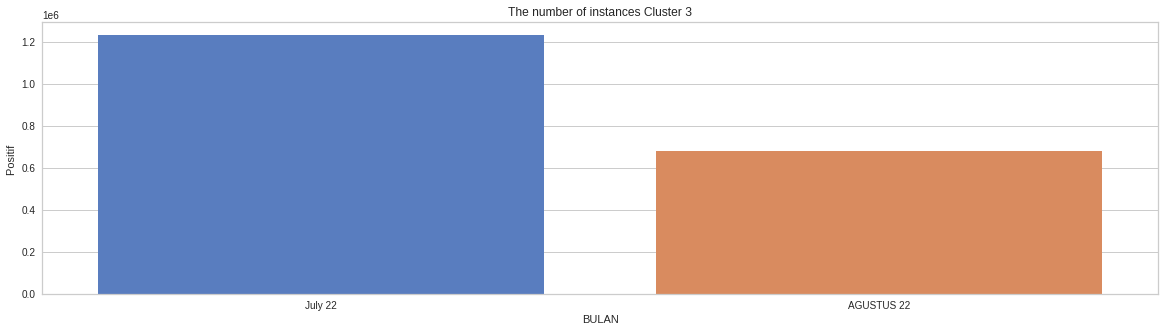

In [ ]:
Group3 = new_data[new_data['cluster_label']==2]
plt.figure(figsize=(20, 5))
sns.barplot(data=Group3,
            x="BULAN",
            y="Positif ",
            palette = "muted"
           )

plt.title("The number of instances Cluster 3")
plt.show()

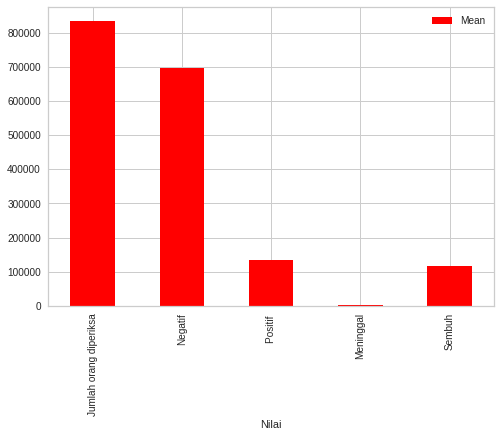

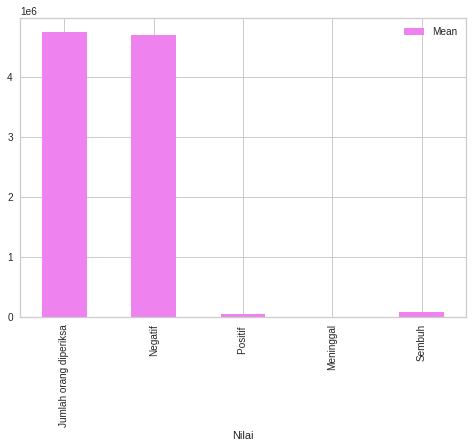

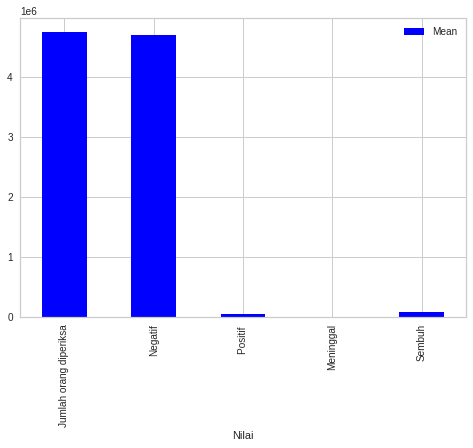

In [ ]:
#melakukan analisa data dari group 1 2 dan 3, disini kita menampilkan rata rata setiap fitur dari masing masing cluster yang dibuat
Group1 = new_data[new_data['cluster_label' ]==0]
Group1 = Group1.drop(['cluster_label', 'BULAN' , 'TAHUN'], axis = 1)

Group2 = new_data[new_data['cluster_label' ]==1]
Group2 = Group2.drop(['cluster_label', 'BULAN' , 'TAHUN'], axis = 1)

Group3 = new_data[new_data['cluster_label' ]==2]
Group3 = Group3.drop(['cluster_label', 'BULAN' , 'TAHUN'], axis = 1)


#menampilkan plot yang menampilkan rata rata
m1 = Group1.mean()
col = Group1.columns
df = pd.DataFrame({ 'Nilai':col, 'Mean':m1})
ax = df.plot.bar(x='Nilai', y='Mean', rot=90, color = 'red')

m2 = Group2.mean()
col = Group2.columns
df = pd.DataFrame({ 'Nilai':col, 'Mean':m2})
ax = df.plot.bar(x='Nilai', y='Mean', rot=90, color = 'violet')

m3 = Group3.mean()
col = Group3.columns
df = pd.DataFrame({ 'Nilai':col, 'Mean':m2})
ax = df.plot.bar(x='Nilai', y='Mean', rot=90, color = 'blue')

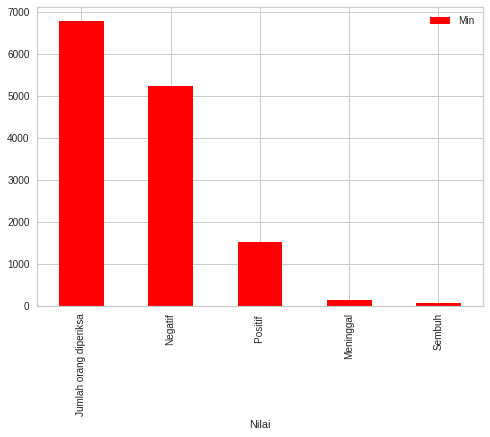

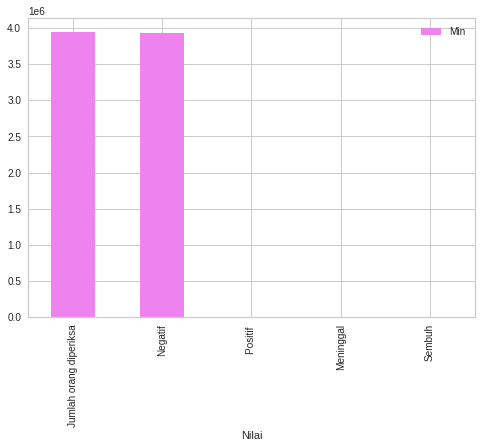

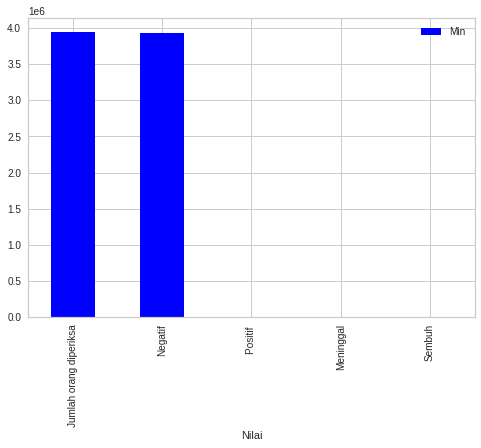

In [ ]:
#plot nilai minimum cluster
m3 = Group1.min()
col = Group1.columns
df = pd.DataFrame({ 'Nilai':col, 'Min':m3})
ax = df.plot.bar(x='Nilai', y='Min', rot=90, color = 'red')

m4 = Group2.min()
col = Group2.columns
df = pd.DataFrame({ 'Nilai':col, 'Min':m4})
ax = df.plot.bar(x='Nilai', y='Min', rot=90, color = 'violet')

m5 = Group3.min()
col = Group3.columns
df = pd.DataFrame({ 'Nilai':col, 'Min':m4})
ax = df.plot.bar(x='Nilai', y='Min', rot=90, color = 'blue')